# LAB 7: Error analysis

Objectives
* Construct a  linear text classifier using SGDClassifier
* Evaluate its performance and categorize the errors that it makes
* Eaxmine model's coefficients and decision function values
* Interpret model results using LIME

In [1]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [2]:
train = pd.read_parquet("s3://ling583/lab7-train.parquet", storage_options={"anon":True})
test = pd.read_parquet("s3://ling583/lab7-test.parquet", storage_options={"anon":True})

In [3]:
import cloudpickle
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [4]:
sgd = cloudpickle.load(open("sgd.model", "rb"))

In [5]:
predicted = sgd.predict(test["text"])
print(classification_report(test["topics"], predicted))

              precision    recall  f1-score   support

        GJOB       0.98      0.93      0.95       573
        GPOL       0.94      0.96      0.95      1853
        GSPO       1.00      0.99      1.00      1410
        GVIO       0.92      0.91      0.92       928

    accuracy                           0.96      4764
   macro avg       0.96      0.95      0.95      4764
weighted avg       0.96      0.96      0.96      4764



---

## LIME

In [6]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

In [7]:
explainer = LimeTextExplainer(class_names=sgd.named_steps['sgdclassifier'].classes_)

In [8]:
test["topics"].iloc[1613], test["text"].iloc[1613]

('GPOL',
 'Top N.Korean officers climb hierarchy - Seoul. A North Korean marshal and two vice-marshals have been listed in the top seven of the Stalinist country\'s ruling hierarchy in a political shift towards the military, analysts said on Monday. "It is unprecedented that three military figures have been listed in such high positions," said Park Sung-hoon, a director general at the Unification Ministry in Seoul. Park said the three officers were listed among the seven top leaders when Pyongyang released its hierarchy during a military parade on Friday. The parade marked the 65th anniversary of the army. "(North Korean leader) Kim Jong-il depends almost solely on the military to maintain the country\'s system," Park said. Marshal Ri Ul-sol and vice marshals Jo Myong-rok and Kim Yong-chun were ranked only behind Kim Jong-il, supreme commander of the country\'s 1.1 million-strong military, and three vice presidents. Kim Jong-il has yet to be formally confirmed as state president and ge

In [9]:
exp = explainer.explain_instance(
    test["text"].loc[1613], sgd.decision_function, num_features=15, labels=[0, 1, 2, 3]
)

[]

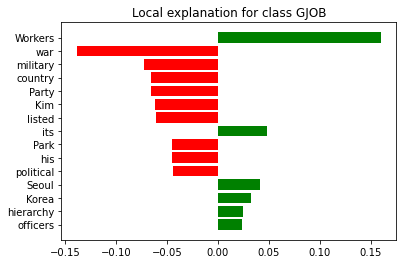

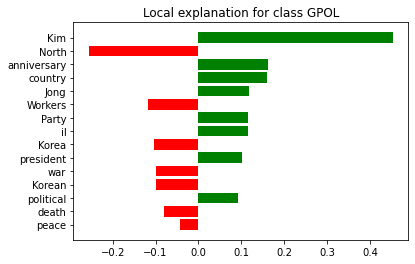

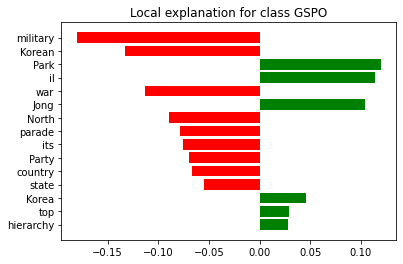

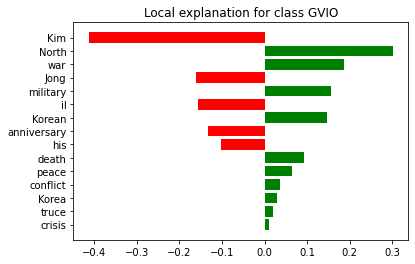

In [10]:
for i in range(0, 4):
    exp.as_pyplot_figure(i)
plt.plot()

In [11]:
err = test[(test['topics']=='GVIO')&(predicted=='GPOL')]

In [12]:
err.iloc[30]

text      Afghan Taleban denies profiting from heroin tr...
topics                                                 GVIO
Name: 1432, dtype: object

In [13]:
err.iloc[30]['text']

'Afghan Taleban denies profiting from heroin trade. Afghanistan\'s Taleban Islamic militia on Sunday denied a British minister\'s charge that it was using funds from heroin trade to buy weapons. Taleban deputy foreign minister Sher Mohammad Abbas Stanakzai told Reuters in an interview that the fundamentalist militia was not benefitting from opium cultivation and the British accusation was one-sided. He was reacting to an article by a junior minister at the British foreign office, Derek Fatchett, published on Wednesday in the Guardian newspaper. "There is no doubt that opium is grown in Afgahnistan and we have said it can be useful for human beings," Stanakzai said. But he said 80 percent of people involved in the production and trafficking of heroin, which is made from opium, were foreigners and that the Taleban movement was ready to cooperate in tackling this problem. "The Taleban acquiesce in and benefit from the opium production and in the drug trade out of Afghanistan," Fatchett wr

[]

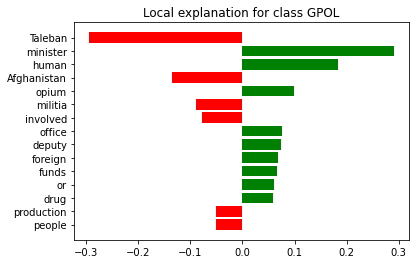

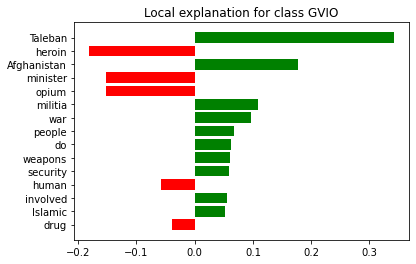

In [14]:
exp = explainer.explain_instance(
    err["text"].iloc[30], sgd.decision_function, num_features=15, labels=[1, 3]
)
for i in [1, 3]:
    exp.as_pyplot_figure(i)
plt.plot()

In [15]:
err.iloc[50]

text      Guerrillas oppose Burma application for ASEAN....
topics                                                 GVIO
Name: 2751, dtype: object

In [16]:
err.iloc[50]['text']

'Guerrillas oppose Burma application for ASEAN. The leader of Burma\'s main ethnic guerrillas, the Karen National Union (KNU), on Tuesday urged ASEAN nations not to accept the country as a member of the regional grouping. General Bo Mya said the Association of Southeast Asian Nations (ASEAN) should not accept Burma as a member because he said it was still run by a "military dictatorship". "The KNU is strongly opposed to the SLORC\'s plan to apply for membership of ASEAN and we are appealing to ASEAN nations not to accept a country that is still run by a military dictatorship to be one of its members," the 67-year old KNU leader told reporters at this jungle base in southeastern Burma near the Thai border. He was referring to Burma\'s ruling military body, the State Law and Order Restoration Council (SLORC). Malaysia\'s foreign minister Abdullah Badawi said earlier Burma made a formal application for full membership of ASEAN. The Malaysian national news agency Bernama quoted Abdullah as

[]

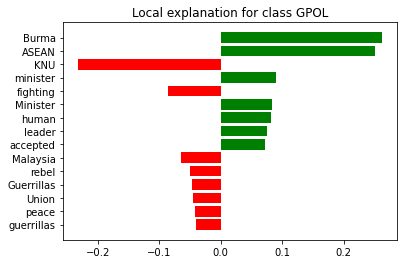

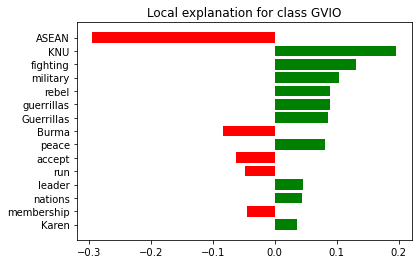

In [17]:
exp = explainer.explain_instance(
    err["text"].iloc[50], sgd.decision_function, num_features=15, labels=[1, 3]
)
for i in [1, 3]:
    exp.as_pyplot_figure(i)
plt.plot()

In [18]:
import kwic

In [19]:
kwic.kwic('upper', train['text'])

9,"to holiday trips and cars rather than on having children, Dobritz said. In",upper,"-income groups, many women choose not to have children because they do not"
26,"the Sejm, needed to muster 50 percent plus one of the votes to reject the",upper,"house veto. The Church, drawing on the authority of Polish-born Pope John"
52,"t did not project how many seats each party would win. The Senate, the new",upper,"chamber of Czech parliament which will have limited legislative powers, is"
182,"approve the mission, by 162 votes to 81 with one abstention in the Senate (",upper,house). Prodi was never in danger since he commands an absolute majority i
196,s. The rupiah quickly recovered from Thursday's weakness to trade near the,upper,limit of the central bank's intervention band against the dollar. At 0842
268,the SPD can block most tax measures through its majority in the Bundesrat,upper,"house. Kohl warned SPD leaders, who pulled out of tax talks with the gover"
400,n two years without elections. His draft constitution would also create an,upper,"house of parliament partly appointed by himself, and give him the right to"
448,"t, is about 70 km (45 miles) south of Lubutu, which guards the road to the",Upper,"Zaire provincial capital of Kisangani, headquarters for a counter-offensiv"
489,"nists, had left for the Christmas holidays. The government had the Senate (",upper,"house) reject the harshest amendments, but the bill's return to the lower"
544,"vote against, an offifial said. The bill now advances to the floor of the",upper,house. The legislation is considered important for upcoming privatizatio


**TO DO:** Write a brief general summary of the results of this analysis (along with the previous ones). Do we have a good classifier? What would be the next steps for improving it?

Based on the usage of the SGD classifer and the analysis behidn it, overall I think it is a good classifier. Any classifier that has an f1-score of 0.9 and above is an ideal starting place to work with to minimize misclassification. The error analysis is a good way of evaluating labels with other labels with proportions of misclassified articles so we can change our labels to better suit them. The SGD classifier tells us to go narrower in scope in terms of the label, which is better. The decision function and the LIME method tells us that the association of words within articles that the classifier can handle in relation to the labels. This tells us that the we need to put more effort into articles with more than one label to be evaluated by humans rather than a computer, as it's a way to improve the method of classification based on what the classifer can't handle. So overall, the next step would be to try out how labels are associated with the context of the sentence structure based on the words used in the sentence. This method could be a great way to create labels based on context rather than just words used.